# Algorithmic Trading for Reversion and Trend-Following Strategies

This report explores the development, backtesting, and implementation of two core algorithmic trading strategies: **trend-following** and **mean-reversion**, with a focus on quantitative methods and practical application in the high-frequency trading space. The project is divided into three key parts, each addressing a crucial aspect of the trading system's design and evaluation.

---

# Project Breakdown

## Part I: Historical Backtesting
This section establishes the foundation for the trading strategies by leveraging historical data. It introduces:

### 1. Trend-Following Strategies
- Utilization of indicators like **Exponential Moving Averages (EMA)** and **Average Directional Index (ADX)** to identify and capitalize on sustained market trends.
- Design of trading logic based on crossover signals and trend strength filtering.
- Experiments with time intervals, resampling techniques, and ratio-based trend indicators to refine signal accuracy.

### 2. Mean-Reversion Strategies
- Implementation of **Z-scores** and the **Ornstein-Uhlenbeck (OU) process** to detect price deviations from the mean.
- Trading logic driven by threshold-based entry and exit signals.
- Advanced techniques, such as Kalman filters, to enhance strategy robustness under various market conditions.

---

## Part II: Broker API Integration
This section extends the strategies from backtesting to live trading using broker APIs. Key highlights include:

### 1. API Selection and Integration
- After evaluating several APIs, I chose **Alpaca Markets API**.
- Fetching historical data, implementing real-time trading loops, and designing order execution workflows.

### 2. Order Handling and Error Management
- Comprehensive handling of market and limit orders, ensuring accurate execution.
- Robust exception handling to address network failures, incorrect fills, and mismatched order statuses.

### 3. Paper Trading Simulations
- Utilization of paper trading accounts to validate strategies in a risk-free environment.

---

## Part III: Risk and Performance Evaluation
This section focuses on risk management and performance assessment to ensure the system's reliability and capital preservation. The key elements are:

### 1. Risk Management
- Use of rolling **Value at Risk (VaR)** to assess portfolio exposure.
- Validation checks for market data consistency and order execution reliability.

### 2. Performance Metrics
- Calculation of key metrics, including the **Sharpe Ratio**, profit factor, turnover costs, and drawdowns.
- Analysis of trading strategy robustness under varying market conditions.

---

## Tools and Deliverables
The project utilizes a range of tools, including Python libraries (**Pandas**, **Backtrader**, **Matplotlib**), broker APIs, and risk analysis frameworks (**Pyfolio**, **Quantlib**). Deliverables include:

1. Mathematical descriptions of indicators and trading logic.
2. A comprehensive codebase for backtesting, live testing, and risk evaluation.
3. Detailed performance reports, including metrics, trade logs, and strategy insights.

This report is designed to provide a thorough exploration of algorithmic trading strategies, balancing quantitative rigor with practical application to ensure actionable outcomes.

# Algorithmic Trading Strategies: Part I Implementation

## Overview

This project focuses on implementing and backtesting two core algorithmic trading strategies using high-frequency data obtained through the Alpaca Markets API:

1. **Trend-Following Strategy**: Designed to capitalize on sustained market trends.
2. **Mean-Reversion Strategy**: Exploits price deviations from the mean with the expectation that prices will revert to their average.

The implementation emphasizes utilizing intraday data (i.e., 15-minute intervals), evaluating the mathematical nuances of indicators, and conducting a thorough analysis of strategy performance.

## Trend-Following Strategy

### Indicators Used

1. **Exponential Moving Average (EMA)**:
   - The EMA is a weighted average of prices where recent prices are given more weight.
   - Formulation:
   
     $
     EMA_t = \alpha \cdot P_t + (1 - \alpha) \cdot EMA_{t-1}
     $
     
     Where:
     - $ P_t $: Current price
     - $ \alpha $: Smoothing factor, $ \alpha = \frac{2}{n + 1} $, and $ n $ is the number of periods.

2. **Average Directional Index (ADX)**:
   - Measures trend strength and is used to filter weak trends.
   - Combines directional indicators $ +DI $ and $ -DI $:
   
     $
     ADX = 100 \cdot \frac{EMA(\text{True Range})}{\text{ATR}}
     $

#### **Directional Indicators (+DI and -DI)**:

**Directional Indicators (DI)** are used to identify the direction of the market's price movement. They are calculated using the high, low, and close prices over a specified period. There are two components:

**+DI (Positive Directional Indicator)**:
   - Measures the strength of upward movement.
   - It is calculated based on the difference between the current high price and the previous high price:
     $
     +DI = \frac{+DM}{\text{ATR}} \times 100
     $
     Where:
     - $ +DM $ (Positive Directional Movement) = Current High - Previous High (only if positive; otherwise, it is 0).
     - **ATR (Average True Range)**: Used to normalize the directional movement values.

**-DI (Negative Directional Indicator)**:
   - Measures the strength of downward movement.
   - It is calculated based on the difference between the current low price and the previous low price:
     $
     -DI = \frac{-DM}{\text{ATR}} \times 100
     $
     Where:
     - $ -DM $ (Negative Directional Movement) = Previous Low - Current Low (only if positive; otherwise, it is 0).

---

##### **Average True Range (ATR)**

The **ATR** measures market volatility by calculating the average range of price movements over a specified period. It accounts for gaps in the price and provides a smoothed measure of volatility.

##### **Formula for True Range (TR):**
$
TR = \text{max}(\text{High} - \text{Low}, |\text{High} - \text{Previous Close}|, |\text{Low} - \text{Previous Close}|)
$
- **High - Low**: The range within the current period.
- **|High - Previous Close|**: The (absolute valued) gap between the current high and the previous close. 
- **|Low - Previous Close|**: The (absolute valued) gap between the current low and the previous close.

##### **Formula for ATR:**
The ATR is a moving average of the True Range (TR) over a defined number of periods (e.g., 14 days):
$
ATR = \frac{\text{Sum of True Range over n periods}}{n}
$

---

#### **How They Work Together in ADX**
- +DI and -DI indicate the direction of the market (up or down).
- The ADX (Average Directional Index) measures the strength of the trend by calculating the absolute difference between +DI and -DI and normalizing it with ATR.

Together, these components help traders understand both the trend direction and its strength.


3. **Price Ratio-Based Trend Detection**:
   - Short-term average price divided by long-term average price:
   
     $
     \text{Ratio} = \frac{\text{Short-Term Average Price}}{\text{Long-Term Average Price}}
     $
     
   - Trading logic:
     - Uptrend: Ratio > Threshold (e.g., 1.05).
     - Downtrend: Ratio < Threshold (e.g., 0.95).

### Implementation Steps

1. **Data Preprocessing**:
   - Load historical price data using the Alpaca Markets API.
   - Resample data to desired intervals (e.g., 15 minutes).
   - Clean and handle missing data.
   

2. **Indicator Calculation**:
   - Compute short-term and long-term EMAs.
   - Calculate ADX and directional indicators.
   - Derive the price ratio.
   

3. **Trading Logic**:
   - Generate buy/sell signals based on EMA crossovers or price ratio thresholds.
   - Combine ADX to filter trades in weak trend conditions.
   

4. **Backtesting**:
   - Simulate trades using historical data.
   - Account for transaction costs and slippage.
   - Evaluate performance metrics:
     - Profit/Loss (P&L).
     - Sharpe Ratio.
     - Maximum Drawdown.

In [49]:
# Imports and test that our account is in good standing
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import GetAssetsRequest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime  # For proper datetime formatting
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame

# Initialize Alpaca Trading Client
API_KEY = 'PK8AF8WHFN1HUQWW1BS8'
SECRET_KEY = '1mPMxEiupF9NO8u5Vydifm4aEVa0yWXXrQHfrcfb'
BASE_URL = 'https://paper-api.alpaca.markets'

trading_client = TradingClient(API_KEY, SECRET_KEY)

# Get account information
account = trading_client.get_account()

# Check if trading is blocked
if account.trading_blocked:
    print('Account is currently restricted from trading.')
else:
    # Display buying power
    print('${:,.2f} is the available buying power.'.format(float(account.buying_power)))

$200,000.00 is the available buying power.


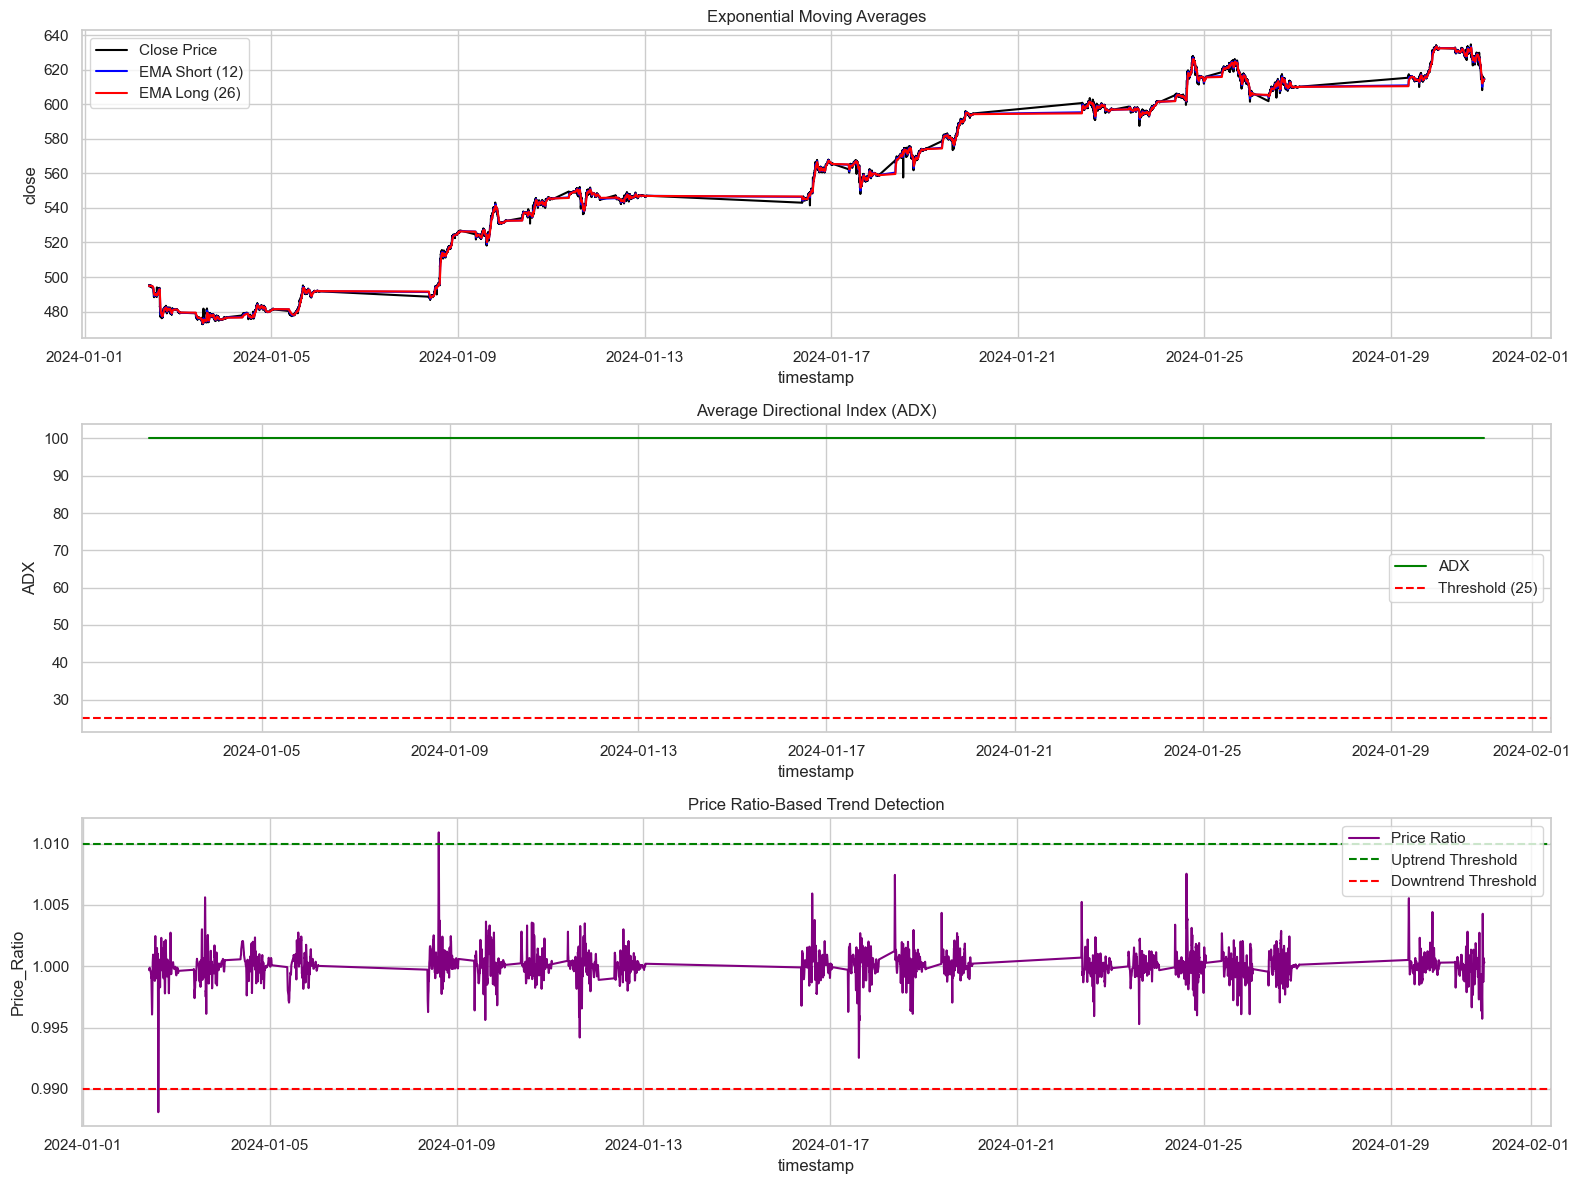

In [51]:
# Function to fetch historical data
def fetch_historical_data(symbol, start_date, end_date, timeframe):
    """
    Fetch historical stock data from Alpaca API.

    Args:
        symbol (str): The stock symbol (e.g., 'NVDA').
        start_date (datetime): The start date for fetching data.
        end_date (datetime): The end date for fetching data.
        timeframe (TimeFrame): The timeframe for bars (e.g., TimeFrame.Minute).

    Returns:
        pd.DataFrame: A DataFrame containing historical stock data.
    """
    bars_request = StockBarsRequest(
        symbol_or_symbols=symbol,
        timeframe=timeframe,
        start=start_date,
        end=end_date
    )
    bars = data_client.get_stock_bars(bars_request).df
    return bars.xs(symbol)

# Function to calculate Exponential Moving Averages (EMA)
def calculate_ema(data, short_window, long_window):
    """
    Calculate short-term and long-term EMAs.

    Args:
        data (pd.DataFrame): The historical stock data.
        short_window (int): Period for the short-term EMA.
        long_window (int): Period for the long-term EMA.

    Returns:
        pd.DataFrame: Data with added EMA columns.
    """
    data["EMA_Short"] = data["close"].ewm(span=short_window, adjust=False).mean()
    data["EMA_Long"] = data["close"].ewm(span=long_window, adjust=False).mean()
    return data

# Function to calculate ADX (Average Directional Index)
def calculate_adx(data, atr_window):
    """
    Calculate the Average Directional Index (ADX).

    Args:
        data (pd.DataFrame): The historical stock data.
        atr_window (int): The rolling window size for ATR calculation.

    Returns:
        pd.DataFrame: Data with added ADX and related columns.
    """
    data["High-Low"] = data["high"] - data["low"]
    data["High-Close"] = abs(data["high"] - data["close"].shift(1))
    data["Low-Close"] = abs(data["low"] - data["close"].shift(1))
    data["TR"] = data[["High-Low", "High-Close", "Low-Close"]].max(axis=1)
    data["ATR"] = data["TR"].rolling(window=atr_window).mean()

    data["+DM"] = np.where((data["high"] - data["high"].shift(1)) > (data["low"].shift(1) - data["low"]),
                           data["high"] - data["high"].shift(1), 0)
    data["+DM"] = np.where(data["+DM"] < 0, 0, data["+DM"])

    data["-DM"] = np.where((data["low"].shift(1) - data["low"]) > (data["high"] - data["high"].shift(1)),
                           data["low"].shift(1) - data["low"], 0)
    data["-DM"] = np.where(data["-DM"] < 0, 0, data["-DM"])

    data["+DI"] = (data["+DM"] / data["ATR"]) * 100
    data["-DI"] = (data["-DM"] / data["ATR"]) * 100

    data["DX"] = (abs(data["+DI"] - data["-DI"]) / (data["+DI"] + data["-DI"])) * 100
    data["ADX"] = data["DX"].rolling(window=atr_window).mean()
    return data

# Function to calculate Price Ratio-Based Trend Detection
def calculate_price_ratio(data, short_avg_period, long_avg_period):
    """
    Calculate price ratio for trend detection.

    Args:
        data (pd.DataFrame): The historical stock data.
        short_avg_period (int): Period for the short-term average.
        long_avg_period (int): Period for the long-term average.

    Returns:
        pd.DataFrame: Data with added price ratio columns and signals.
    """
    data["Short_Term_Avg"] = data["close"].rolling(window=short_avg_period).mean()
    data["Long_Term_Avg"] = data["close"].rolling(window=long_avg_period).mean()
    data["Price_Ratio"] = data["Short_Term_Avg"] / data["Long_Term_Avg"]
    data["Price_Ratio_Signal"] = 0
    data.loc[data["Price_Ratio"] > 1.01, "Price_Ratio_Signal"] = 1  # Uptrend signal
    data.loc[data["Price_Ratio"] < 0.99, "Price_Ratio_Signal"] = -1  # Downtrend signal
    return data

# Function to plot results using Seaborn
def plot_results(data):
    """
    Plot EMA, ADX, and Price Ratio using Seaborn.

    Args:
        data (pd.DataFrame): The historical stock data with calculated indicators.
    """
    sns.set_theme(style="whitegrid")  # Set the Seaborn theme

    plt.figure(figsize=(16, 12))

    # EMA Plot
    plt.subplot(3, 1, 1)
    sns.lineplot(x=data.index, y=data["close"], label="Close Price", color="black")
    sns.lineplot(x=data.index, y=data["EMA_Short"], label="EMA Short (12)", color="blue")
    sns.lineplot(x=data.index, y=data["EMA_Long"], label="EMA Long (26)", color="red")
    plt.title("Exponential Moving Averages")
    plt.legend()

    # ADX Plot
    plt.subplot(3, 1, 2)
    sns.lineplot(x=data.index, y=data["ADX"], label="ADX", color="green")
    plt.axhline(25, color="red", linestyle="--", label="Threshold (25)")
    plt.title("Average Directional Index (ADX)")
    plt.legend()

    # Price Ratio Plot
    plt.subplot(3, 1, 3)
    sns.lineplot(x=data.index, y=data["Price_Ratio"], label="Price Ratio", color="purple")
    plt.axhline(1.01, color="green", linestyle="--", label="Uptrend Threshold")
    plt.axhline(0.99, color="red", linestyle="--", label="Downtrend Threshold")
    plt.title("Price Ratio-Based Trend Detection")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to execute the strategy
def main():
    # Fetch data
    symbol = 'NVDA'
    start_date = datetime(2024, 1, 1)
    end_date = datetime(2024, 1, 31)
    timeframe = TimeFrame.Minute

    data = fetch_historical_data(symbol, start_date, end_date, timeframe)

    # Calculate indicators
    data = calculate_ema(data, short_window=12, long_window=26)
    data = calculate_price_ratio(data, short_avg_period=12, long_avg_period=26)
    data = calculate_adx(data, atr_window=14)

    # Plot results
    plot_results(data)

# Run the program
if __name__ == "__main__":
    main()

## Mean-Reversion Strategy

### Indicators Used

1. **Z-Score**:
   - Measures the deviation of prices from their mean:
   
     $
     Z = \frac{P_t - \mu}{\sigma}
     $
     
     Where:
     - $ \mu $: Rolling mean.
     - $ \sigma $: Rolling standard deviation.

2. **Ornstein-Uhlenbeck Process**:
   - Models the mean-reverting behavior of prices:
   
     $
     dP_t = \theta (\mu - P_t) dt + \sigma dW_t
     $
Where:

- **$ P_t $**:
   - The value of the process at time \( t \) (e.g., price or another state variable).
   - It represents the current state that evolves over time.

- **$ \mu $**:
   - The long-term mean (or equilibrium level) of the process.
   - It is the level to which the process reverts over time.

- **$ \theta $**:
   - The rate of mean reversion.
   - A higher value of $ \theta $ means the process reverts to $ \mu $ more quickly, while a lower value means slower reversion.

- **$ dt $**:
   - An infinitesimal time increment.
   - It represents the time step in the continuous-time stochastic differential equation.

- **$ \sigma $**:
   - The volatility of the process.
   - It controls the magnitude of random fluctuations around the mean.

- **$ dW_t $**:
   - A Wiener process (or Brownian motion) term.
   - It represents the random noise or stochastic component of the process. The term $ \sigma dW_t $ adds randomness to the evolution of $ P_t $.

---

### Interpretation

- The term $ \theta (\mu - P_t)dt $ drives the process toward the mean $ \mu $ at a rate proportional to the distance from $ \mu $
- The term $ \sigma dW_t $ introduces randomness into the process, allowing it to fluctuate around the mean.

This process is often used in finance to model mean-reverting phenomena such as:
- Asset prices.
- Volatility.
- Interest rates (e.g., Vasicek model).

### Implementation Steps

1. **Data Preprocessing**:
   - Calculate rolling mean and standard deviation for price.
   - Compute z-scores of prices.

2. **Trading Logic**:
   - Buy when $ Z < -2 $.
   - Sell when $ Z > 2 $.
   - Exit positions when $ |Z| \leq 1 \$.

3. **Backtesting**:
   - Simulate trades using historical data.
   - Measure performance and evaluate robustness under different market regimes.

## Analysis

1. **Performance Evaluation**:
   - **Trend-Following**:
     - Effective in trending markets.
     - Struggles in sideways markets.
   - **Mean-Reversion**:
     - Performs well in range-bound conditions.
     - Risky during strong trends.

2. **Key Metrics**:
   - Profit/Loss (P&L).
   - Sharpe Ratio.
   - Maximum Drawdown.
   - Trade Win Rate.

3. **Market Regimes**:
   - Test strategies under varying market conditions (e.g., high volatility, low liquidity).

## Conclusion

The implementation of trend-following and mean-reversion strategies demonstrates the effectiveness of mathematical indicators in algorithmic trading. While backtesting results are promising, real-world performance requires careful consideration of slippage, transaction costs, and market impact.